# Assignment 2 (Part 2)

### Assignment Instructions

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...`
* You are **not** allowed to use for-loops anywhere in the assignment
* You are **not** allowed to import any other libraries
* Use **only** seaborn or pandas to make plots
* In questions which require storing of answer, if nothing else mentioned use `qKAns` to store the answer where K is question number.

In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We will explore a dataset, usually used in machine learning to perform classification. It has several demographic features of an adults and a column that shows whether they have an income of atleast 50k. Ofcourse, before performing machine learning we need to visualise clean the dataset and visualise so as to ascertain whether it will give reliable results.

**Question 1** Read the dataset `adults.csv` into the variable `adultsData`. `fnlwgt` is the index column.

In [3]:
#Write your code here
adultsData = pd.read_csv("adults.csv", index_col="fnlwgt")
adultsData

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
fnlwgt,,,,,,,,,,,,,,
226802.0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
89814.0,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
336951.0,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
160323.0,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
103497.0,18.0,NaN,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257302.0,27.0,Private,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
154374.0,40.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
151910.0,58.0,Private,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K


In [4]:
grader.check('q1')

results: All test cases passed!

**Question 2** Convert all numerical columns, including the index, into the `int` datatype. 

In [5]:
numericColumns = adultsData.select_dtypes("number")
numericColumnsNames = list(numericColumns.columns)
adultsData[numericColumnsNames] = numericColumns.astype("int")
adultsData.index = adultsData.index.astype("int")
# adultsData

In [6]:
grader.check('q2')

results: All test cases passed!

**Question 3** Map the income column to `0` for `<= 50k` and `1` otherwise.  

In [7]:
#Write your code here
adultsData["income"] = adultsData["income"].str.replace("<=50K", "0")
adultsData["income"] = adultsData["income"].str.replace(">50K", "1")

In [8]:
grader.check('q3')

results: All test cases passed!

**Question 4** Change the name of the column `education-num` to `years of education` and `relationship` to `relationship status`. Replace dashes in the index names with spaces (without hardcoding).

In [9]:
#Write your code here
adultsData.rename(columns={"educational-num":"years of education", "relationship":"relationship status"}, inplace=True)
adultsData.columns = adultsData.columns.str.replace("-", " ")
adultsData

,age,workclass,education,years of education,marital status,occupation,relationship status,race,gender,capital gain,capital loss,hours per week,native country,income
fnlwgt,,,,,,,,,,,,,,
226802,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
89814,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
336951,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
160323,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
103497,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257302,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
154374,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
151910,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [10]:
grader.check('q4')

results: All test cases passed!

**Question 5** Convert all the string columns into the `string` datatype. 

In [11]:
stringColumns = adultsData.select_dtypes("object")
stringColumns.drop("income", axis=1, inplace=True)
stringColumnsNames = list(stringColumns.columns)
adultsData[stringColumnsNames] = stringColumns.astype("string")
adultsData

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,workclass,education,years of education,marital status,occupation,relationship status,race,gender,capital gain,capital loss,hours per week,native country,income
fnlwgt,,,,,,,,,,,,,,
226802,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
89814,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
336951,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
160323,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
103497,18,<NA>,Some-college,10,Never-married,<NA>,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257302,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
154374,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
151910,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [12]:
grader.check('q5')

results: All test cases passed!

**Question 6** Write a function `dashToSpace` that receives an entire column of a dataframe and returns a copy of the column with dashes replaced dashes with spaces.

In [13]:
#Write your code here
def dashToSpace(col):
    try:
        col = col.str.replace("-", " ")
        return col
    except AttributeError:
        return col

In [14]:
grader.check('q6')

results: All test cases passed!

**Question 7** Use the function `dashtoSpace` inplace on `adultsData`. 

In [15]:
#Write your code here
selected_columns = adultsData.columns[adultsData.dtypes == "string"]
adultsData[selected_columns] = adultsData[selected_columns].apply(dashToSpace)
adultsData

,age,workclass,education,years of education,marital status,occupation,relationship status,race,gender,capital gain,capital loss,hours per week,native country,income
fnlwgt,,,,,,,,,,,,,,
226802,25,Private,11th,7,Never married,Machine op inspct,Own child,Black,Male,0,0,40,United States,0
89814,38,Private,HS grad,9,Married civ spouse,Farming fishing,Husband,White,Male,0,0,50,United States,0
336951,28,Local gov,Assoc acdm,12,Married civ spouse,Protective serv,Husband,White,Male,0,0,40,United States,1
160323,44,Private,Some college,10,Married civ spouse,Machine op inspct,Husband,Black,Male,7688,0,40,United States,1
103497,18,<NA>,Some college,10,Never married,<NA>,Own child,White,Female,0,0,30,United States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257302,27,Private,Assoc acdm,12,Married civ spouse,Tech support,Wife,White,Female,0,0,38,United States,0
154374,40,Private,HS grad,9,Married civ spouse,Machine op inspct,Husband,White,Male,0,0,40,United States,1
151910,58,Private,HS grad,9,Widowed,Adm clerical,Unmarried,White,Female,0,0,40,United States,0


In [16]:
grader.check('q7')

results: All test cases passed!

**Question 8** There are 4 types of data: `Nominal`, `Ordinal`, `Discrete`, `Continous`. Make a series of datatype `string` that shows that type of data in each column in the order that the column is present in the data. Assign the answer to `q8Ans`.

In [17]:
#Write your code here
q8Ans = pd.Series(["Discrete", "Nominal", "Ordinal", "Discrete", "Nominal", "Nominal", "Nominal", "Nominal", "Nominal", "Continous", "Continous", "Discrete", "Nominal", "Ordinal"], dtype="string")
q8Ans

0      Discrete
1       Nominal
2       Ordinal
3      Discrete
4       Nominal
5       Nominal
6       Nominal
7       Nominal
8       Nominal
9     Continous
10    Continous
11     Discrete
12      Nominal
13      Ordinal
dtype: string

In [18]:
grader.check('q8')

results: All test cases passed!

**Question 9** Just as you defined a function above to replace dots with dashes in each column and then applied it on each column. Make another function `unique` to find the the number of unique values of each column. 

In [19]:
#Write your code here
def unique(col):
    return len(col.unique())

In [20]:
q9Ans = adultsData.apply(unique)
q9Ans

age                     74
workclass                9
education               16
years of education      16
marital status           7
occupation              15
relationship status      6
race                     5
gender                   2
capital gain           123
capital loss            99
hours per week          96
native country          42
income                   2
dtype: int64

In [21]:
grader.check('q9')

results: All test cases passed!

**Question 10** Visualize the number of missing values for only the columns with missing values. 

Text(0, 0.5, 'Count')

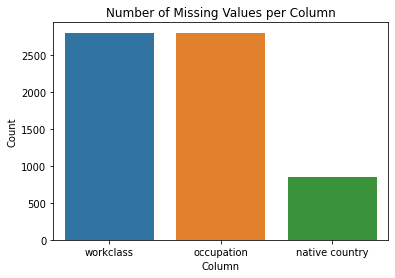

In [22]:
#Write your code here
columnCounts = adultsData.isna().sum()
missingValuesColumns = columnCounts[columnCounts > 0]
sns.barplot(x=missingValuesColumns.index, y=missingValuesColumns)
plt.title("Number of Missing Values per Column")
plt.xlabel("Column")
plt.ylabel("Count")

**Question 11** In this question we will deal with null values. Replace the null values in each column with the non-null categorical mode of the column with the years of education. What that means is for each unique value of `years of education` find the mode of column's non-null rows. See me in my office hours if you don't understand this. Use loops if you wish.

In [23]:
for column in adultsData:
    for i in range(len(adultsData[column])):
        if(pd.isna(adultsData[column].iloc[i])):
            current_yoe = adultsData['years of education'].iloc[i]
            yoeDf = adultsData[adultsData['years of education'] == current_yoe]
            yoeMode = yoeDf[column].mode()[0]
            adultsData[column].iloc[i] = yoeMode

In [24]:
grader.check('q11')

results: All test cases passed!

**Question 12** Combine `capital gain` and `capital loss` columns into `capital profit`. Insert `capital profit` into `adultsData` right before `income`.

In [25]:
#Write your code here
capital_profit = adultsData["capital gain"] - adultsData["capital loss"]
adultsData.insert(13, "capital profit", capital_profit)
adultsData.drop(["capital gain", "capital loss"], axis=1, inplace=True)
adultsData

,age,workclass,education,years of education,marital status,occupation,relationship status,race,gender,hours per week,native country,capital profit,income
fnlwgt,,,,,,,,,,,,,
226802,25,Private,11th,7,Never married,Machine op inspct,Own child,Black,Male,40,United States,0,0
89814,38,Private,HS grad,9,Married civ spouse,Farming fishing,Husband,White,Male,50,United States,0,0
336951,28,Local gov,Assoc acdm,12,Married civ spouse,Protective serv,Husband,White,Male,40,United States,0,1
160323,44,Private,Some college,10,Married civ spouse,Machine op inspct,Husband,Black,Male,40,United States,7688,1
103497,18,Private,Some college,10,Never married,Adm clerical,Own child,White,Female,30,United States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257302,27,Private,Assoc acdm,12,Married civ spouse,Tech support,Wife,White,Female,38,United States,0,0
154374,40,Private,HS grad,9,Married civ spouse,Machine op inspct,Husband,White,Male,40,United States,0,1
151910,58,Private,HS grad,9,Widowed,Adm clerical,Unmarried,White,Female,40,United States,0,0


In [26]:
grader.check('q12')

results: All test cases passed!

**Question 13** Display a colored correlation heatmap of the appropriate dimensions for all numerical columns.

<AxesSubplot:>

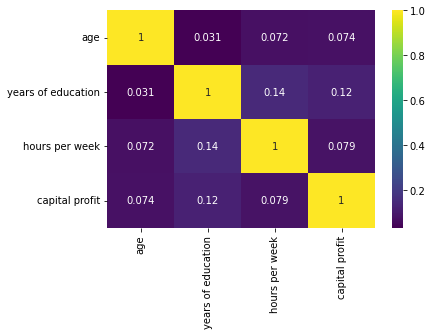

In [27]:
#Write your code here
# adultsData.corr() automatically chooses the numerical columns only
sns.heatmap(adultsData.corr(), annot=True, cmap="viridis")

**Question 14** Describe what the heatmap shows. 

The heatmap shows the following:
The heatmap shows a correlation matrix that's been color coded, with the brighter colors representing a higher correlation, and darker ones representing a lower correlation.
- Values such as hours per week vs years of education are brighter than the rest as indicated by the values in them.
- Values such as years of education and age have little correlation
 
A correlation matrix computes the correlation between all of the numerical columns in the dataset, and gives them a value between 0 and 1.
- Values close to 0 represent no, or little, correlation.
- Values close to 1 represent high, to complete, correlation. This is why the diagonals are all 1s, as variables will have complete correlation with each other.

**Question 15** Make pivot table of years of education and proportion of people with the both incomes. Visualise it and explain the trend you see in the plot. 

income,0,1
years of education,,
1,0.987952,0.012048
2,0.967611,0.032389
3,0.946955,0.053045
4,0.935079,0.064921
5,0.945767,0.054233
6,0.937365,0.062635
7,0.949227,0.050773
8,0.926941,0.073059
9,0.841422,0.158578


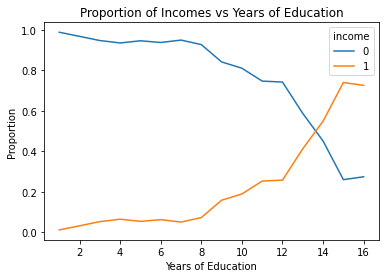

In [28]:
#Write your code and answer here
from matplotlib.pyplot import legend


incomePivotTable = pd.pivot_table(adultsData, index="years of education", columns="income", values="age", aggfunc=len)
rowSums = incomePivotTable.sum(axis=1)
incomePivotTable["0"] = incomePivotTable["0"]/rowSums
incomePivotTable["1"] = incomePivotTable["1"]/rowSums
fig = incomePivotTable.plot(kind="line")
fig.set_xlabel("Years of Education")
fig.set_ylabel("Proportion")
fig.set_title("Proportion of Incomes vs Years of Education")
incomePivotTable
# Explanation given in the next cell

**Question 15 Explanation:**

As can be seen from the line plot above, the proportion of individuals with income = 0 (<= 50K) steadily decreases as the years of education increase. Conversely, the proportion of individuals with income = 1 steadily increases as the years of education also increase.

- $income=0 \propto \frac{1}{years\;of\;education}$
- $income=1 \propto years\;of\;education$

We can see that at around 14 years of education, more individuals have income = 1 (>50K) than individuals with income = 0 (<=50K), and a sharp change in proportions occurs at around 12 years of education.

**Question 16** Draw suitable plots that show distribution of the average of the income column with all numerical columns. Use loops here.

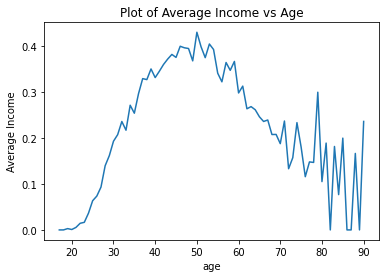

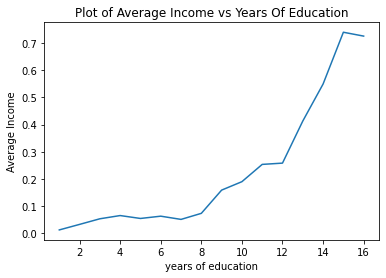

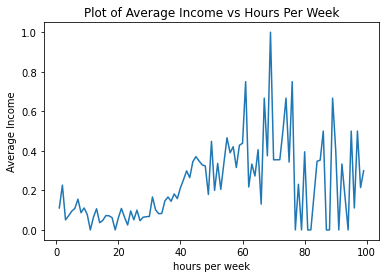

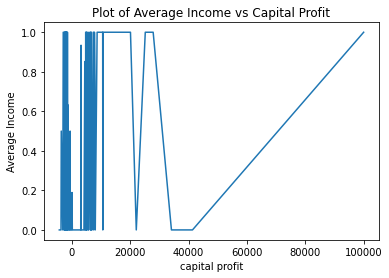

In [29]:
#Write your code here
from matplotlib.pyplot import xlabel, ylabel

numericalDf = adultsData.select_dtypes("number")

# {column:{value:average_income}}
averageIncomeDistribution = {}
tempDf = adultsData.copy()
tempDf["income"] = adultsData["income"].astype("int")
    
for column in numericalDf.columns:
    averageIncomeDistribution[column] = {}
    unique_values = sorted(numericalDf[column].unique())
    # print(unique_values)
    for unique_value in unique_values:
        averageIncomeDistribution[column][unique_value] = tempDf.loc[tempDf[column] == unique_value, "income"].mean()

# Plotting
for column in averageIncomeDistribution:
    x_values = list(averageIncomeDistribution[column].keys())
    y_values = list(averageIncomeDistribution[column].values())
    fig = sns.lineplot(x=x_values, y=y_values)
    fig.set_title("Plot of Average Income vs " + column.title())
    fig.set_xlabel(column)
    fig.set_ylabel("Average Income")
    plt.show()

**Question 17** Draw all scatterplots such that there are unique values of a numerical column on the x-axis and the corresponding mean value of the other numerical column on the y-axis.

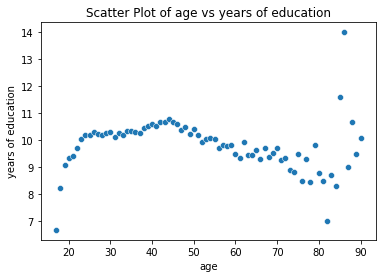

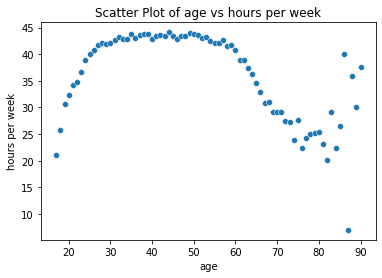

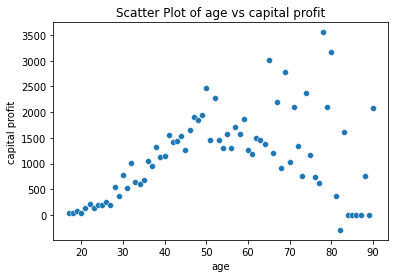

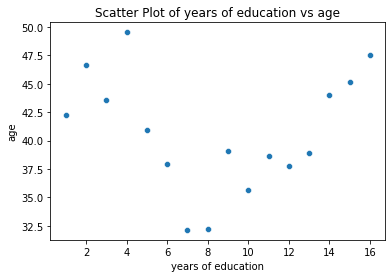

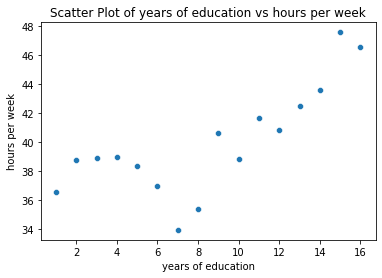

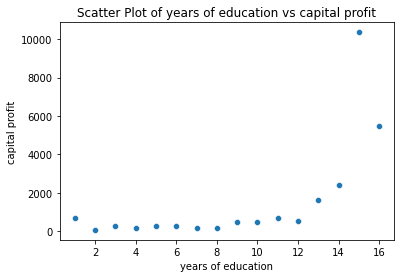

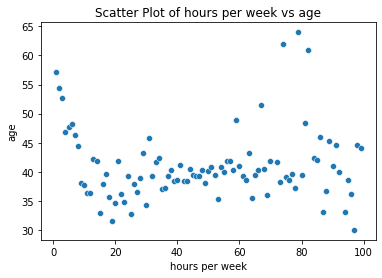

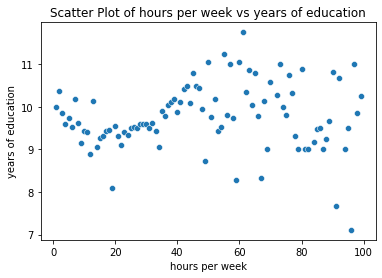

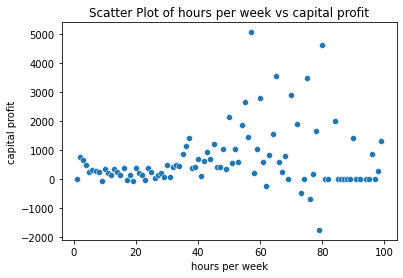

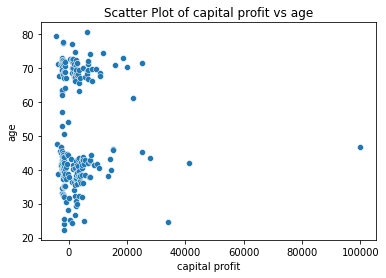

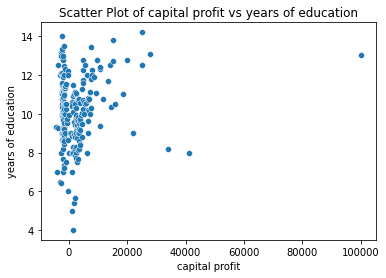

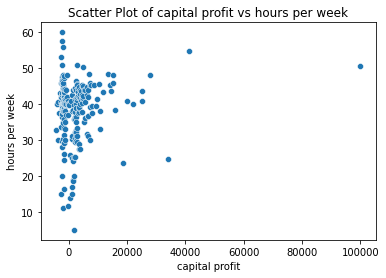

In [30]:
#Write your code here
# {x_column:{value:average_other_column}}

tempDf = adultsData.copy()
tempDf["income"] = adultsData["income"].astype("int")
    
for column in numericalDf.columns:
    unique_values = sorted(numericalDf[column].unique())
    # print(unique_values)
    for average_column in numericalDf.columns:
        averageValues = []
        if average_column != column:
            for unique_value in unique_values:
                averageValues.append(tempDf.loc[tempDf[column] == unique_value, average_column].mean())
         
            # Plotting
            fig = sns.scatterplot(x=unique_values, y=averageValues)
            fig.set_title("Scatter Plot of " + column + " vs " + average_column)
            fig.set_xlabel(column)
            fig.set_ylabel(average_column)
            plt.show()

**Question 18** For each age what is the least `hours per day` individuals work. Plot only the least 10.

Text(0.5, 1.0, 'Least Ages for Least Hours per Day')

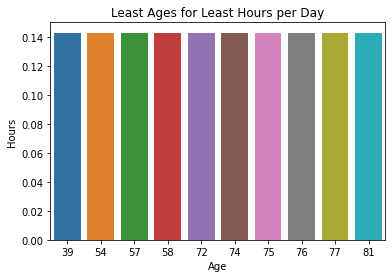

In [31]:
#Write your code here
hoursDf = adultsData[["age","hours per week"]].copy()
hoursDf["hours per day"] = hoursDf["hours per week"]/7
leastHoursDf = hoursDf.groupby("age")["hours per day"].min()
leastHoursDf
least10Df = leastHoursDf.sort_values()[:10]
least10Df

# Plotting
fig = sns.barplot(x=least10Df.index, y=least10Df)
fig.set_xlabel("Age")
fig.set_ylabel("Hours")
fig.set_title("Least Ages for Least Hours per Day")

**Question 19** For each non-numerical column, use a suitable plot to show the distribution of average of the `income` column. use loops here.

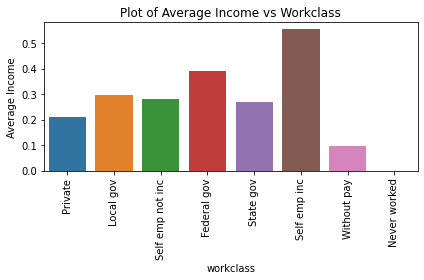

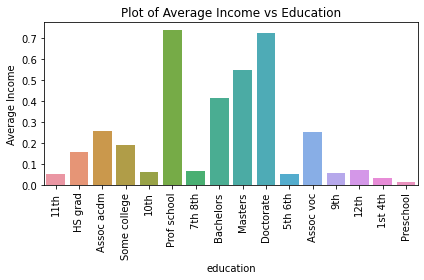

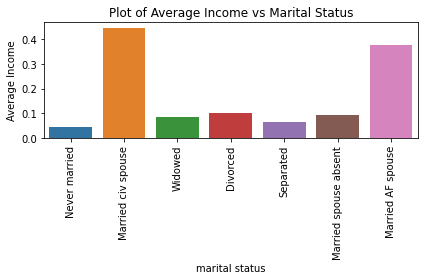

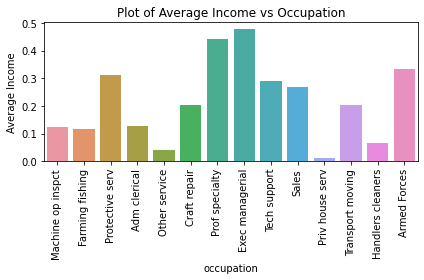

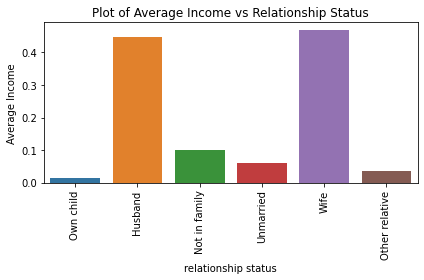

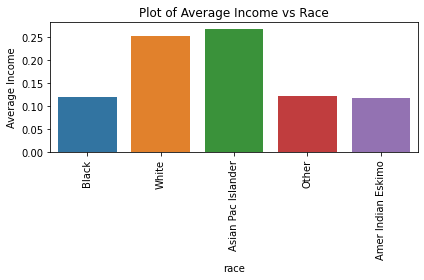

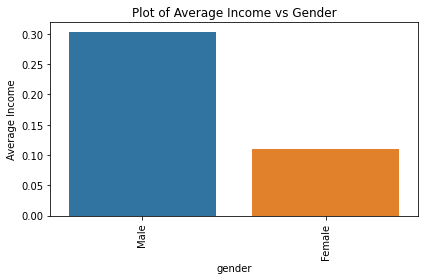

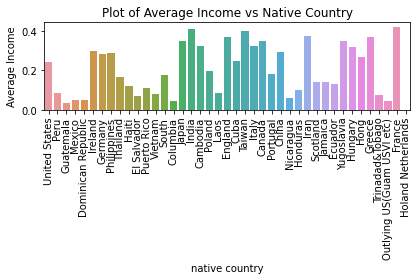

In [32]:
#Write your code here

nonNumericalDf = adultsData.select_dtypes("string")
nonNumericalDf

# {column:{value:average_income}}
averageIncomeDistribution = {}
tempDf = adultsData.copy()
tempDf["income"] = adultsData["income"].astype("int")
tempDf = tempDf.dropna()
    
for column in nonNumericalDf.columns:
    averageIncomeDistribution[column] = {}
    unique_values = tempDf[column].unique()
    # print(unique_values)
    for unique_value in unique_values:
        averageIncomeDistribution[column][unique_value] = tempDf.loc[tempDf[column] == unique_value, "income"].mean()

# Plotting
for column in averageIncomeDistribution:
    x_values = list(averageIncomeDistribution[column].keys())
    y_values = list(averageIncomeDistribution[column].values())
    fig = sns.barplot(x=x_values, y=y_values)
    fig.set_title("Plot of Average Income vs " + column.title())
    fig.set_xlabel(column)
    plt.xticks(rotation=90)
    fig.set_ylabel("Average Income")
    plt.tight_layout()
    plt.show()

**Question 20** Describe the relation of each non-numerical column with the income as you see in the above plots. Specifically describe what effect being in a certain category has on the income

Average Income vs Work Class: The relationship between work class and average income doesn't really exist; there's no evident trend that's seen.
- The average income for the work classes hovers around 0.3
- Individuals belonging to "self-employed inc" have the highest average income of ~0.55, followed by "self-employed not inc" with an average income of ~0.4
- Individuals that are in "never worked" can expect an average income of 0
- Therefore, being self employed brings about the highest income, followed by government employees, followed by the private sector, and then never worked

Average Income vs Education: There seems to be a positive correlation between education level and average income; they are directly proportional.
- Pre school brings about the lowest average income of ~0, and doctorates/prof schools will bring about the highest average income of ~0.7

Average Income vs Marital Status: The relationship here is that those who are in married categories will have a higher average income than those who are not.
- "Married AF spouse" and "Married CF spouse" bring about the highest average income
- "Never married" has the lowest average income.

Average Income vs Occupation: A relationship here is not evident.
- Being an "exec manegerial" brings about the highest average income of 0.45
- Being in "priv house serving" brings the least income of around ~0

Average Income vs Relationship Status: Being a partner brings about the highest average income.
- Wives earn the most (~0.45) followed by husbands (~0.42)
- Own child earn the least

Average Income vs Race: All races except for "White" and "Asian Pac Islander" have an average income of ~0.1
- Asian Pac Islanders expect the most income, followed by Whites

Average Income vs Gender: Gender has a huge difference on the Average Income, with Males earning 3 times as much as females (0.3 vs 0.1)

Average Income vs Native Country: The native country has an impact on the average country. Individuals in more developed countries expect a higher average income than those that aren't.
- France has the highest income, while Guatemala has the least

**Question 21** Plot horizontal counts for each category for each non-numerical column. Use loops here.

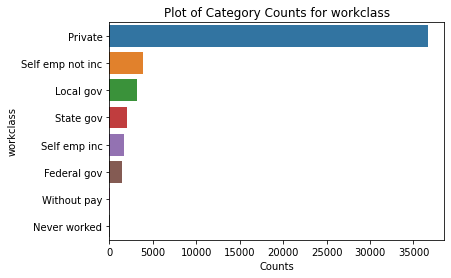

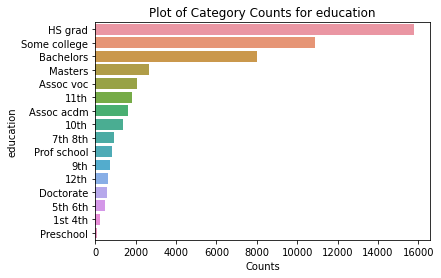

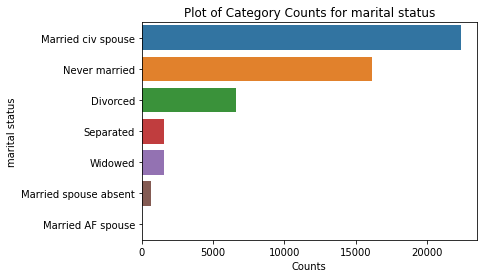

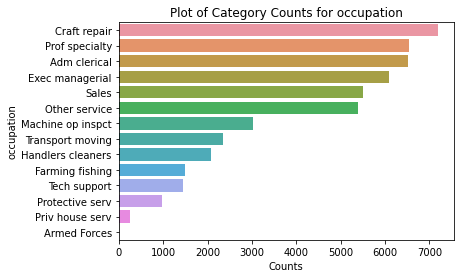

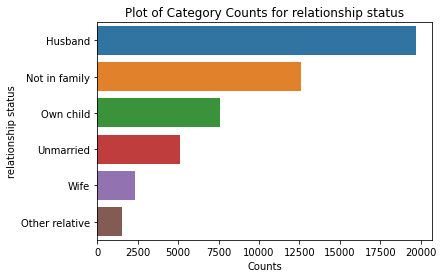

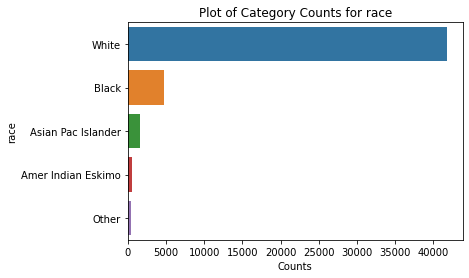

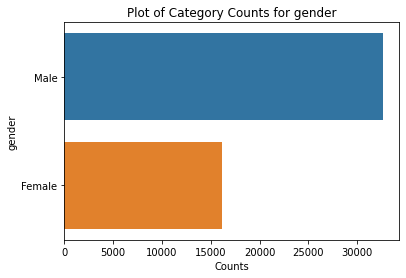

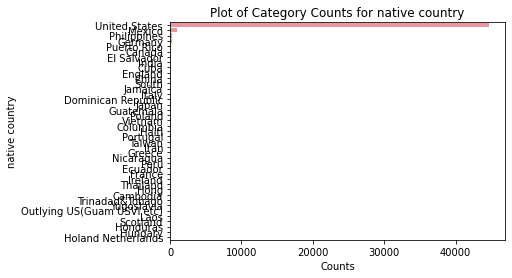

In [33]:
#Write your code here
# {column:{category:counts}}

for column in nonNumericalDf.columns:
    countsSeries = nonNumericalDf[column].value_counts()
    categoryCounts = {}
    for category in countsSeries.index:
        categoryCounts[category] = countsSeries[category]
        
    # Plotting
    fig = sns.barplot(y=list(categoryCounts.keys()), x=list(categoryCounts.values()))
    fig.set_title("Plot of Category Counts for " + column)
    fig.set_xlabel("Counts")
    fig.set_ylabel(column)
    # plt.tight_layout()
    plt.show()

**Question 22** Do the plots above show that we can adequately distinguish incomes based on the data we currently have?

No, they do not.
This is because some categories in a few columns have a much higher count than others, for example Whites have a lot of representation than the other races; this could skew the dataset.
A few columns such as gender show a clear relationship, but the rest do not. This is elaborated in Question 20.

**Question 23** Make a function `column_describe` that receives `adultsData` and the column name and returns the column description as returned by `adultsData.describe()`.

In [34]:
#Write your code here
def column_describe(df, column):
    result = pd.Series({
        "count":len(df[column]), 
        "mean":np.mean(df[column]), 
        "std":np.std(df[column], ddof=1),
        "min":np.min(df[column]),
        "25%":np.percentile(df[column], 25),
        "50%":np.percentile(df[column], 50),
        "75%":np.percentile(df[column], 75),
        "max":np.max(df[column])
        })
    # I had to pass "ddof=1" to np.std() to make it similar to the std returned by pandas in describe()
    return result

In [35]:
grader.check('q23')

results: All test cases passed!

In [36]:
adultsData.describe()

,age,years of education,hours per week,capital profit
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382,991.565313
std,13.710510,2.570973,12.391444,7475.549906
min,17.000000,1.000000,1.000000,-4356.000000
25%,28.000000,9.000000,40.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,99999.000000


**Question 24** Make another function `describe` that receives the dataset and uses the above function to describe the dataframe exactly as adultsData.describe() would do it. Use loops if needed.

In [37]:
#Write your code here
def describe(df):
    result = pd.DataFrame()
    numericalDf = df.select_dtypes("number")
    for column in numericalDf.columns:
        result[column] = column_describe(numericalDf, column)
    return result

describe(adultsData)

,age,years of education,hours per week,capital profit
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382,991.565313
std,13.710510,2.570973,12.391444,7475.549906
min,17.000000,1.000000,1.000000,-4356.000000
25%,28.000000,9.000000,40.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,99999.000000


In [38]:
grader.check('q24')

results: All test cases passed!

**Question 25** Manually build (as taught in class) and plot kernel density plots for each of numerical columns. Loops allowed.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


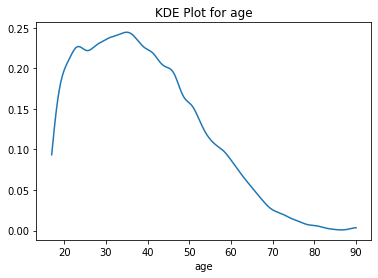

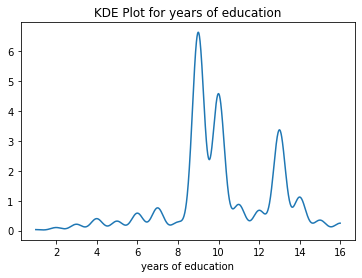

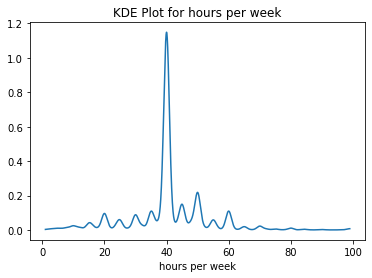

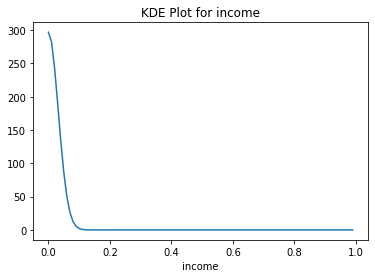

In [39]:
#Write your code here
def kernel(mean, x_min, x_max, s):
    x = np.arange(x_min, x_max, 0.01)
    return 1/np.sqrt(2*np.pi**s**2) * np.exp(-((x-mean)/(2*s**2))**2)

c = 0
numericalDf["income"] = adultsData["income"].astype("int").copy()
kde_s = [0.95, 0.45, 0.80, 0.15]
for column in numericalDf.columns:
    if column == "capital profit": 
        continue
    x_max = numericalDf[column].max() 
    x_min = numericalDf[column].min() 
    x = np.arange(x_min, x_max, 0.01)
    summed_kernel = np.zeros(len(x))
    for i in range(len(numericalDf)):
        summed_kernel += kernel(numericalDf.iloc[i,c], x_min, x_max, kde_s[c])
    summed_kernel /= len(x)
    plt.figure()
    fig = sns.lineplot(x=x, y=summed_kernel)
    fig.set_title("KDE Plot for " + column)
    fig.set_xlabel(column)
    c += 1
    plt.show()

# NOTE: The kde for the final numerical column, capital profit, was taking a very very long time to run, so as per the TA's instructions, it has been omitted from the plots

**Question 26** For each income category compare the distribution of the numerical columns using a suitable plot.

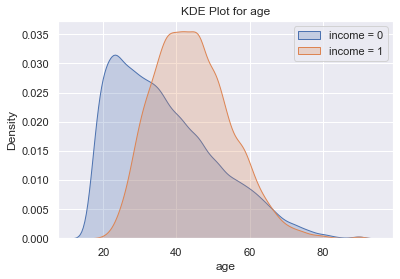

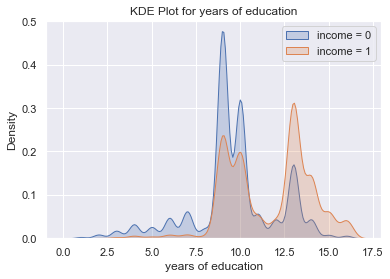

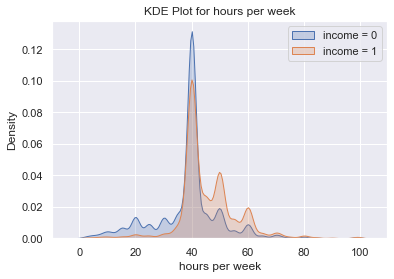

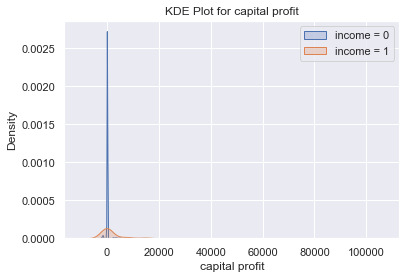

In [40]:
incomeDf = numericalDf.copy()
incomeDf["income"] = adultsData["income"].copy()
oneIncomeDf = incomeDf[incomeDf["income"] == "1"]
zeroIncomeDf = incomeDf[incomeDf["income"] == "0"]
zeroIncomeDf.reset_index(inplace=True)
oneIncomeDf.reset_index(inplace=True)

sns.set_theme()
for column in incomeDf.columns:
    if column == "income":
        continue
    fig = sns.kdeplot(zeroIncomeDf[column], shade=True)
    fig = sns.kdeplot(oneIncomeDf[column], shade=True)
    fig.set_title("KDE Plot for " + column)
    fig.legend(["income = 0", "income = 1"])
    plt.show()

In [41]:
grader.check_all()

 results: All test cases passed!